#Spatializing a Survey Response-Set
---



```
D.A.Anderson. 2022
```





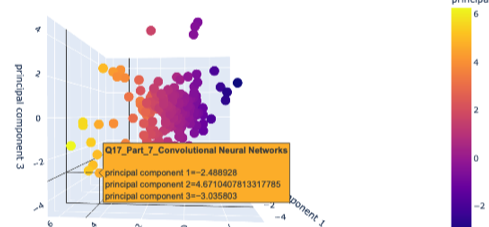


---



#1. Import python libraries

In [ ]:
%%capture
!pip install plotly-express
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

#2. Survey Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kaggle_survey_2021_responses.csv.zip (Unzipped Files)/kaggle_survey_2021_responses.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#3. One-Hot Encode

In [ ]:
dumf=pd.get_dummies(df)

#4. Normalize

In [ ]:
dumf=dumf.rank()*.00001

#5. Transpose

In [ ]:
dumf=dumf.T

#6. PCA

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dumf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf['label']=dumf.index

#7. Ploty 3d chart

In [ ]:
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3', hover_name='label', color='principal component 2')

# 8. Show

In [ ]:
fig.show()